In [30]:
import pandas as pd
import sklearn
from sklearn.metrics.cluster import adjusted_rand_score

import service
from clustering.KMeans import KMeans
from clustering.KMedoids import KMedoids
from clustering.DBSCAN import DBSCAN

### data_1

In [31]:
df = pd.read_csv('data/data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       10 non-null     int64 
 1   y       10 non-null     int64 
 2   label   10 non-null     object
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [32]:
X, labels = df.drop(columns='label'), df['label']
X.shape, labels.shape

((10, 2), (10,))

In [33]:
X = X[['x', 'y']].to_numpy()

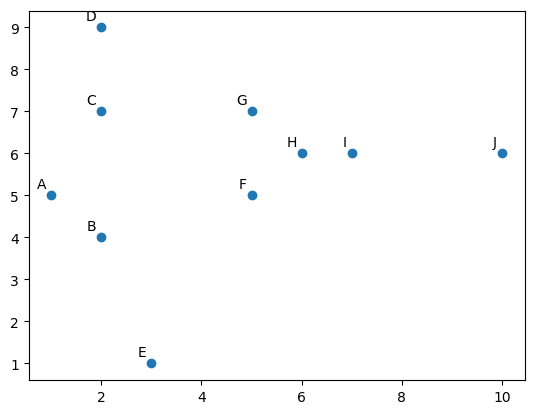

In [34]:
service.plot_raw_data(X, labels)

#### KMeans

In [35]:
n_clusters = 3
init = [[1, 5], [5, 5], [10, 6]]
max_iter = 10
random_state = 42

In [36]:
clusterer = KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [37]:
clusterer.n_iter_

2

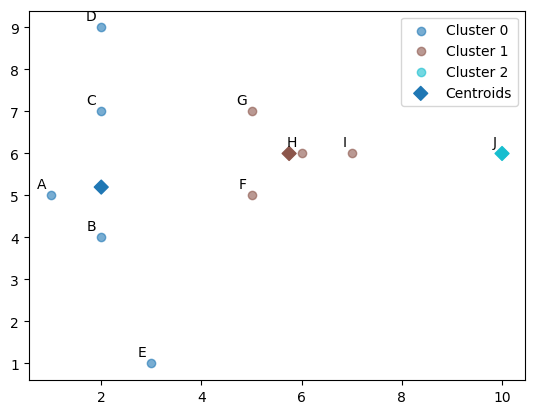

In [38]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

Compare with similar scikit-learn model

In [39]:
sk_clusterer = sklearn.cluster.KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
sk_clusterer.fit(X);

In [40]:
sk_clusterer.n_iter_

2

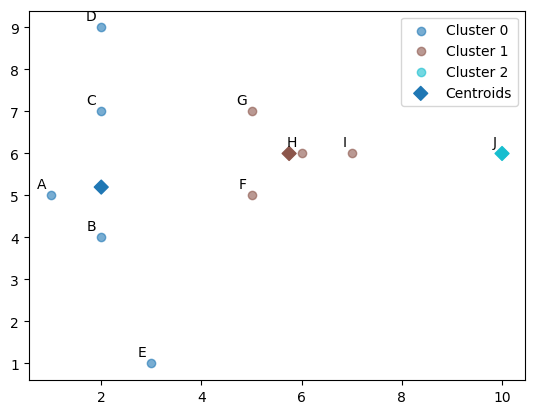

In [41]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
    cluster_centers=sk_clusterer.cluster_centers_,
)

In [42]:
adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_)

1.0

#### KMedoids

In [43]:
n_clusters = 3
init = [[5, 5], [5, 7], [6, 6]]
max_iter = 10
random_state = 42

In [44]:
clusterer = KMedoids(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [45]:
clusterer.n_iter_

2

In [46]:
clusterer.cluster_center_indices_

array([1, 2, 8])

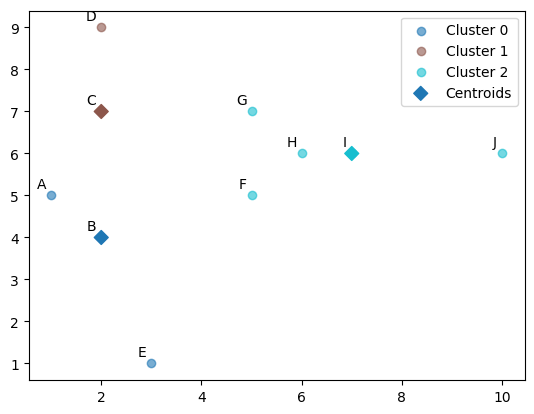

In [47]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

#### DBSCAN

In [48]:
eps = 2
min_samples = 3

In [49]:
clusterer = DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
clusterer.fit(X);

In [50]:
clusterer.core_sample_indices_

array([5, 6, 7])

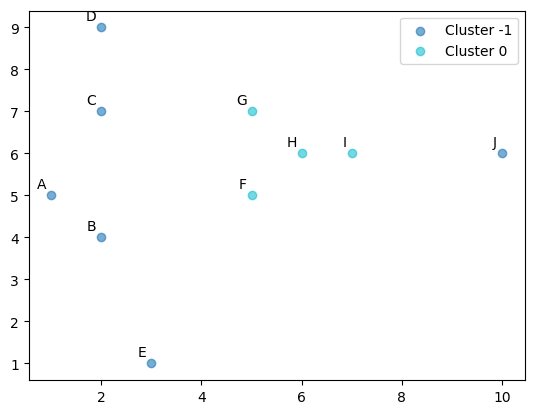

In [51]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

Compare with similar scikit-learn model

In [52]:
sk_clusterer = sklearn.cluster.DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
sk_clusterer.fit(X);

In [53]:
sk_clusterer.core_sample_indices_

array([5, 6, 7])

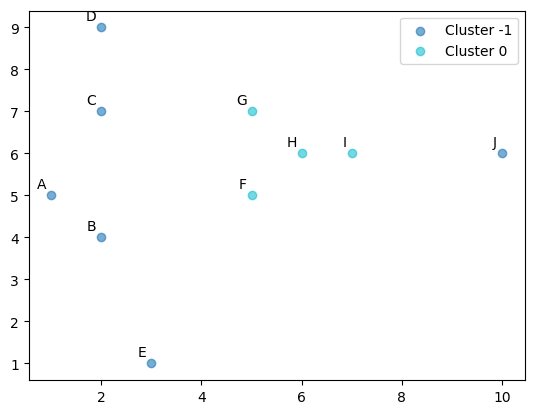

In [54]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

In [55]:
adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_)

1.0

### More datasets

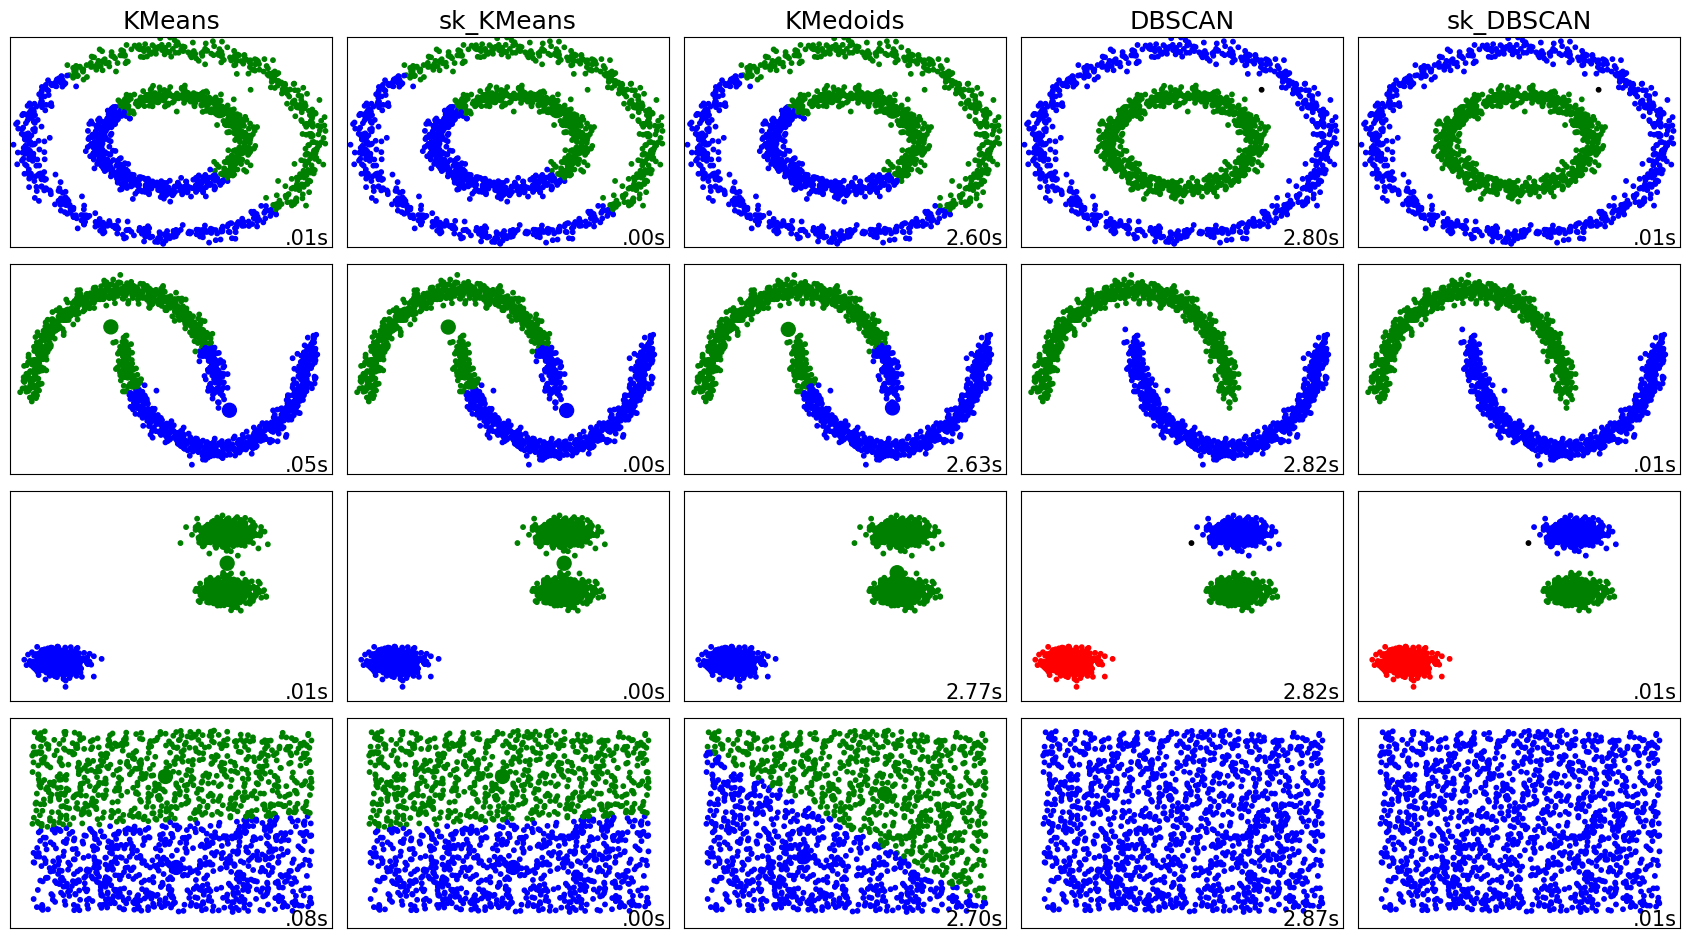

In [56]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets
n_samples = 1500
datasets_list = [
    (datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05), "Noisy Circles"),
    (datasets.make_moons(n_samples=n_samples, noise=.05), "Noisy Moons"),
    (datasets.make_blobs(n_samples=n_samples, random_state=8), "Blobs"),
    ((np.random.rand(n_samples, 2), None), "No Structure")
]

# Define clusterers
init = [[-1, -1], [1, 1]]
clusterers = [
    ("KMeans", KMeans(n_clusters=2, init=init)),
    ("sk_KMeans", cluster.KMeans(n_clusters=2, init=init)),
    ("KMedoids", KMedoids(n_clusters=2, init=init)),
    ("DBSCAN", DBSCAN(eps=0.2)),
    ("sk_DBSCAN", cluster.DBSCAN(eps=0.2)),
]

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(17, 9.5))
plt.subplots_adjust(left=0.001, right=0.999, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01)

plot_num = 1
for dataset, dataset_name in datasets_list:
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    for name, algorithm in clusterers:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        y_pred = algorithm.labels_.astype(int)

        plt.subplot(len(datasets_list), len(clusterers), plot_num)
        if plot_num <= len(clusterers):
            plt.title(name, size=18)

        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(0.99, 0.01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.tight_layout()
plt.show()

### Check clusterers (scikit-learn)

In [57]:
clusterers = [
    KMeans(),
    KMedoids(),
    DBSCAN(),
]  # TODO

In [58]:
from sklearn.utils.estimator_checks import estimator_checks_generator

for clusterer in clusterers:
    total_checks = 0
    skipped_checks = 0  # TODO remove?
    for (estimator, check) in estimator_checks_generator(clusterer):
        total_checks += 1
        check(estimator)
    skipped_percentage = skipped_checks / total_checks * 100
    print(f"{clusterer}: {skipped_checks} out of {total_checks} checks skipped ({skipped_percentage:.2f}%).")

KMeans(): 0 out of 46 checks skipped (0.00%).
KMedoids(): 0 out of 46 checks skipped (0.00%).
DBSCAN(): 0 out of 46 checks skipped (0.00%).
